# 予想気温の予想モデル

In [3]:
# ライブラリ読み込み
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# トレーニングデータの用意
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.zeros([12, 5])

for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month ** n

In [5]:
# 入力値の定義
x = tf.placeholder(tf.float32, [None, 5]) # Noneにより入力データ数は未定で後から変更可能にできる。
t = tf.placeholder(tf.float32, [None, 1])

In [6]:
# 学習パラメータ定義
w = tf.Variable(tf.zeros([5, 1])) # 最適化の対象になるものなので変数として定義

In [7]:
# コスト関数の計算を定義
y = tf.matmul(x, w)
loss = tf.reduce_sum(tf.square(y-t))

In [8]:
# トレーニングアルゴリズムを定義
train_step = tf.train.AdamOptimizer().minimize(loss)

In [9]:
# トレーニングの実行
sess = tf.Session()
sess.run(tf.initialize_all_variables()) # 変数の初期化

i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={ x: train_x, t: train_t })
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={ x: train_x, t: train_t })
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 44.455662
Step: 20000, Loss: 29.294525
Step: 30000, Loss: 28.326700
Step: 40000, Loss: 26.860645
Step: 50000, Loss: 25.776461
Step: 60000, Loss: 25.434757
Step: 70000, Loss: 23.839941
Step: 80000, Loss: 23.564959
Step: 90000, Loss: 22.179653
Step: 100000, Loss: 21.439978


In [10]:
# 学習されたwの値を表示
w_val = sess.run(w)
print("w_val: {0}".format(w_val))

w_val: [[ 3.76339936]
 [-1.58825648]
 [ 1.78468168]
 [-0.2011665 ]
 [ 0.00536037]]


In [11]:
# 予想気温を計算する
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

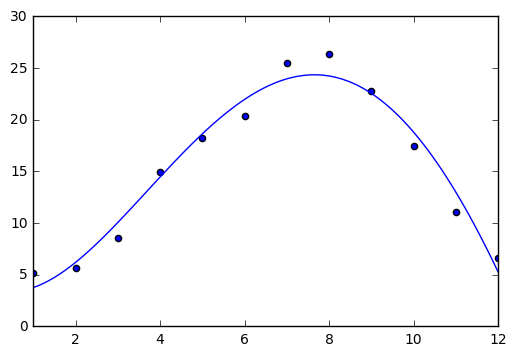

In [12]:
# グラフに表示
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
linex = np.linspace(1, 12, 100)
liney = predict(linex)
subplot.plot(linex, liney)
plt.show()